In [2]:
import numpy as np 
from sklearn.metrics import confusion_matrix 
from scipy.spatial.distance import cdist 
from skimage.measure import label, regionprops, moments, moments_central, moments_normalized, moments_hu 
from skimage import io, exposure 
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle 
import pickle
import pandas as pd

(750, 600)


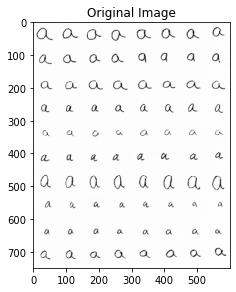

In [3]:
img = io.imread('a.bmp')
print(img.shape) 
io.imshow(img) 
plt.title('Original Image') 
io.show()

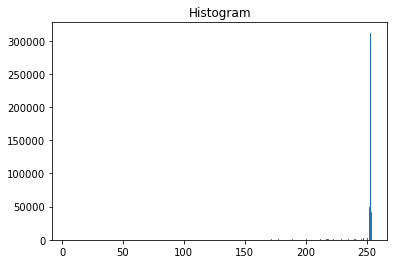

In [4]:
hist = exposure.histogram(img)
plt.bar(hist[1], hist[0]) 
plt.title('Histogram') 
plt.show()

In [5]:
th = 200 
img_binary = (img < th).astype(np.double)

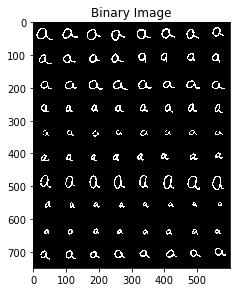

In [6]:
io.imshow(img_binary) 
plt.title('Binary Image') 
io.show()

In [7]:
img_label = label(img_binary, background=0) 

C:\Users\sanji\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


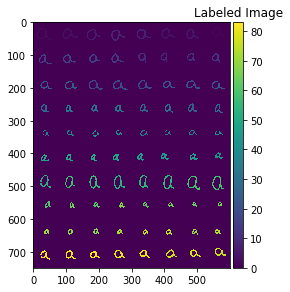

In [8]:
io.imshow(img_label) 
plt.title('Labeled Image') 
io.show() 

In [9]:
print(np.amax(img_label))

83


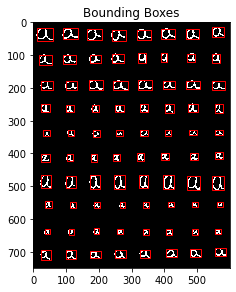

In [10]:
regions = regionprops(img_label) 

io.imshow(img_binary) 

ax = plt.gca() 

#repeatedly check through props in region
for props in regions:
    #find min & max value
    minr, minc, maxr, maxc = props.bbox  
    
    roi = img_binary[minr:maxr, minc:maxc]
    m = moments(roi) 
    cc = m[0, 1] / m[0, 0] 
    cr = m[1, 0] / m[0, 0] 
    mu = moments_central(roi, center=(cr, cc)) 
    nu = moments_normalized(mu)
    hu = moments_hu(nu)
    
    #generate rectangles around letter
    ax.add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=1)) 
    
ax.set_title('Bounding Boxes')
#displays
io.show()

In [11]:
Features=[img] 
Features.append(hu)